# 課程目標:
    
    了解MLP 在神經網路上的應用

# 範例重點:
    以Keras 自帶的 手寫辨識的數據集來說明 MLP 建構的網路模型

# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#宣告採用序列模型
model = Sequential()

W0728 21:37:36.759181  7736 deprecation_wrapper.py:119] From D:\software\Anaconda3\envs\practice\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

W0728 21:38:55.259135  7736 deprecation_wrapper.py:119] From D:\software\Anaconda3\envs\practice\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 21:38:55.772479  7736 deprecation_wrapper.py:119] From D:\software\Anaconda3\envs\practice\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [9]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

W0728 21:50:08.784200  7736 deprecation_wrapper.py:119] From D:\software\Anaconda3\envs\practice\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 21:50:09.017369  7736 deprecation_wrapper.py:119] From D:\software\Anaconda3\envs\practice\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

W0728 21:51:03.915964  7736 deprecation.py:323] From D:\software\Anaconda3\envs\practice\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0728 21:51:03.980005  7736 deprecation_wrapper.py:119] From D:\software\Anaconda3\envs\practice\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 266us/step - loss: 0.2697 - acc: 0.9224 - val_loss: 0.1321 - val_acc: 0.9619
Epoch 2/10
48000/48000 [==============================] - 11s 219us/step - loss: 0.1074 - acc: 0.9687 - val_loss: 0.1047 - val_acc: 0.9690
Epoch 3/10
48000/48000 [==============================] - 10s 217us/step - loss: 0.0705 - acc: 0.9783 - val_loss: 0.0930 - val_acc: 0.9735
Epoch 4/10
48000/48000 [==============================] - 11s 220us/step - loss: 0.0517 - acc: 0.9840 - val_loss: 0.0828 - val_acc: 0.9752
Epoch 5/10
48000/48000 [==============================] - 11s 224us/step - loss: 0.0375 - acc: 0.9882 - val_loss: 0.0770 - val_acc: 0.9763
Epoch 6/10
48000/48000 [==============================] - 10s 217us/step - loss: 0.0264 - acc: 0.9920 - val_loss: 0.0747 - val_acc: 0.9788
Epoch 7/10
48000/48000 [==============================] - 10s 215us/step - loss: 0.0206 - acc: 0.9937 - val_loss: 0.

# 以圖形顯示訓練過程

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

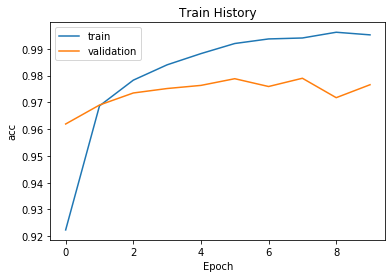

In [14]:
show_train_history(train_history,'acc','val_acc')

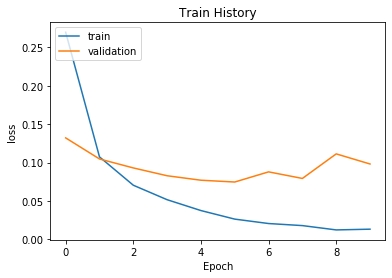

In [15]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [16]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 37us/step

accuracy= 0.9767


# 建立模型 (HW)
新增一至兩層看看最後預測結果是否有差異

In [17]:
#宣告採用序列模型
model1 = Sequential()

In [18]:
#建構輸入層
model1.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [19]:
#新增一層
model1.add(Dense(units=126,  
                kernel_initializer='normal', 
                activation='relu'))

In [20]:
#建構輸出層
model1.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [21]:
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 126)               32382     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1270      
Total params: 234,612
Trainable params: 234,612
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
model1.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [23]:
train_history =model1.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 229us/step - loss: 0.2620 - acc: 0.9229 - val_loss: 0.1381 - val_acc: 0.9563
Epoch 2/10
48000/48000 [==============================] - 11s 224us/step - loss: 0.0993 - acc: 0.9691 - val_loss: 0.0971 - val_acc: 0.9715
Epoch 3/10
48000/48000 [==============================] - 11s 226us/step - loss: 0.0653 - acc: 0.9795 - val_loss: 0.1175 - val_acc: 0.9656
Epoch 4/10
48000/48000 [==============================] - 11s 226us/step - loss: 0.0481 - acc: 0.9845 - val_loss: 0.0800 - val_acc: 0.9768
Epoch 5/10
48000/48000 [==============================] - 11s 229us/step - loss: 0.0378 - acc: 0.9875 - val_loss: 0.0885 - val_acc: 0.9766
Epoch 6/10
48000/48000 [==============================] - 11s 230us/step - loss: 0.0279 - acc: 0.9910 - val_loss: 0.0956 - val_acc: 0.9761
Epoch 7/10
48000/48000 [==============================] - 11s 231us/step - loss: 0.0243 - acc: 0.9921 - val_loss: 0.

In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

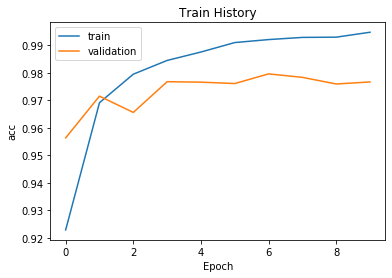

In [25]:
show_train_history(train_history,'acc','val_acc')

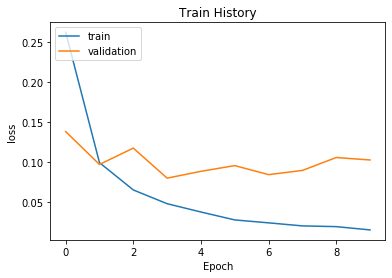

In [26]:
show_train_history(train_history,'loss','val_loss')

In [28]:
scores = model1.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 45us/step

accuracy= 0.9784
